In [37]:
#step 4: pretty graph
#step 5: interesting stats

#see which orders revoke others (who revokes who? who revokes most per orders signed/per year?)
#which orders supercede others? (who supercedes who? who supercedes most per orders signed/per year?)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette('colorblind')
sns.set_style('whitegrid')

In [38]:
df = pd.read_csv('all_data.csv')

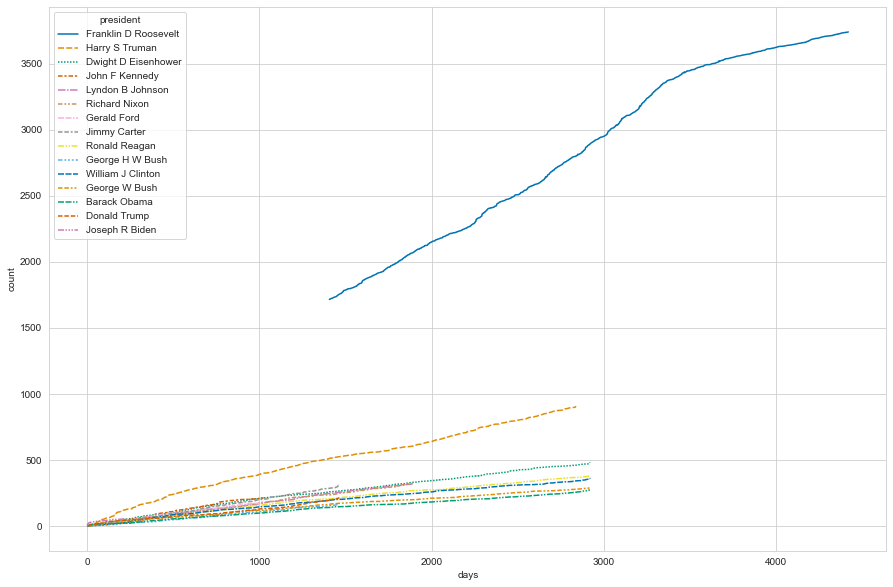

In [57]:
fig, ax = plt.subplots(figsize = (15,10))

sns.lineplot(x='days', y='count', data=df, hue='president', style='president', palette='colorblind')
plt.show()

In [58]:
df_subset = df[df['president'] != 'Franklin D Roosevelt']
df_subsub = df_subset[df_subset['president'] != 'Harry S Truman']

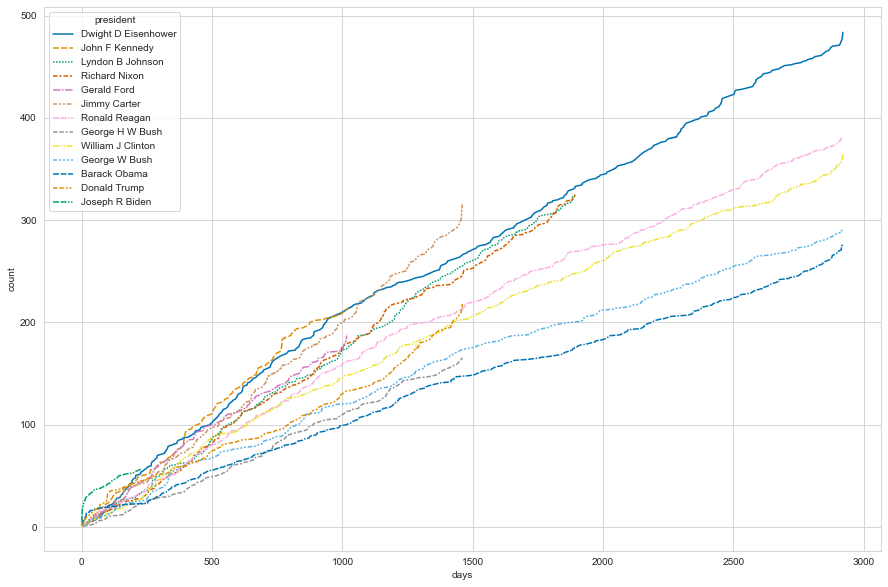

In [59]:
fig, ax = plt.subplots(figsize = (15,10))

sns.lineplot(x='days', y='count', data=df_subsub, hue='president', style='president', palette='colorblind')
plt.show()

In [39]:
preses = df.president.unique()
print(preses)

['Franklin D Roosevelt' 'Harry S Truman' 'Dwight D Eisenhower'
 'John F Kennedy' 'Lyndon B Johnson' 'Richard Nixon' 'Gerald Ford'
 'Jimmy Carter' 'Ronald Reagan' 'George H W Bush' 'William J Clinton'
 'George W Bush' 'Barack Obama' 'Donald Trump' 'Joseph R Biden']


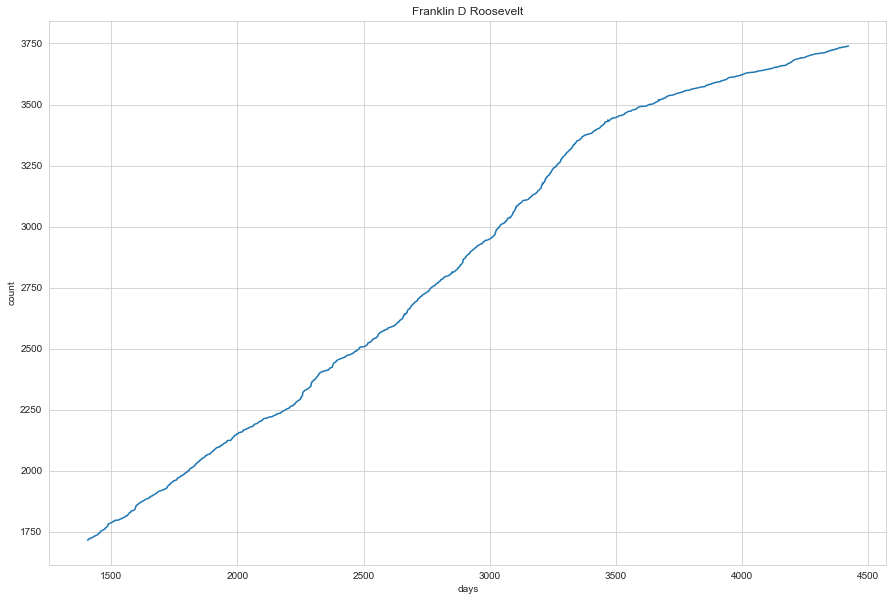

In [40]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x='days', y='count', data=df[df['president']==preses[0]])
plt.title(preses[0])
plt.show()

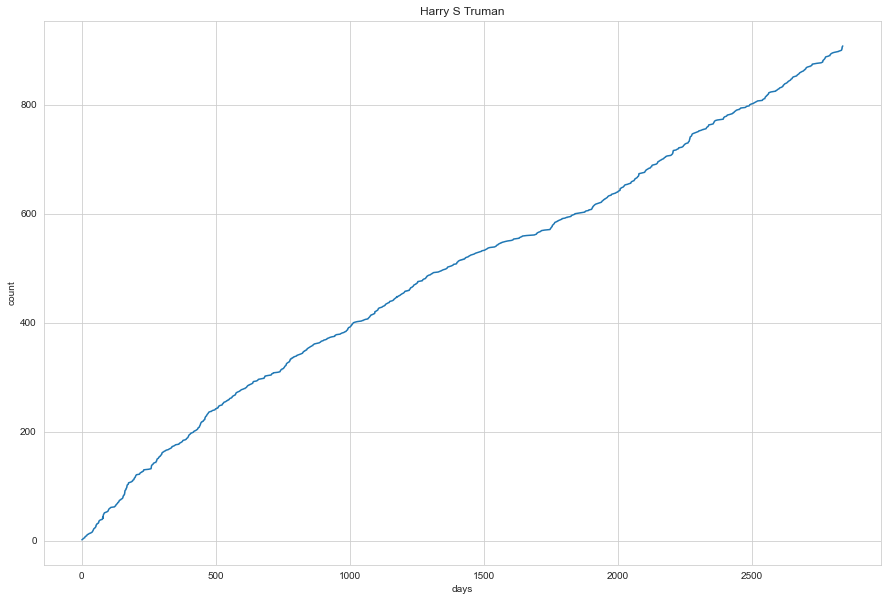

In [41]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x='days', y='count', data=df[df['president']==preses[1]])
plt.title(preses[1])
plt.show()

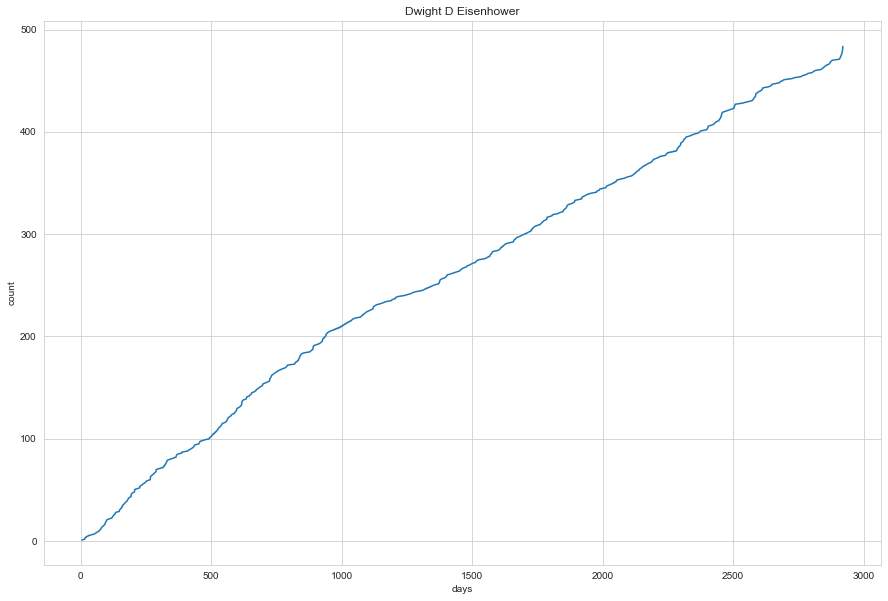

In [42]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x='days', y='count', data=df[df['president']==preses[2]])
plt.title(preses[2])
plt.show()

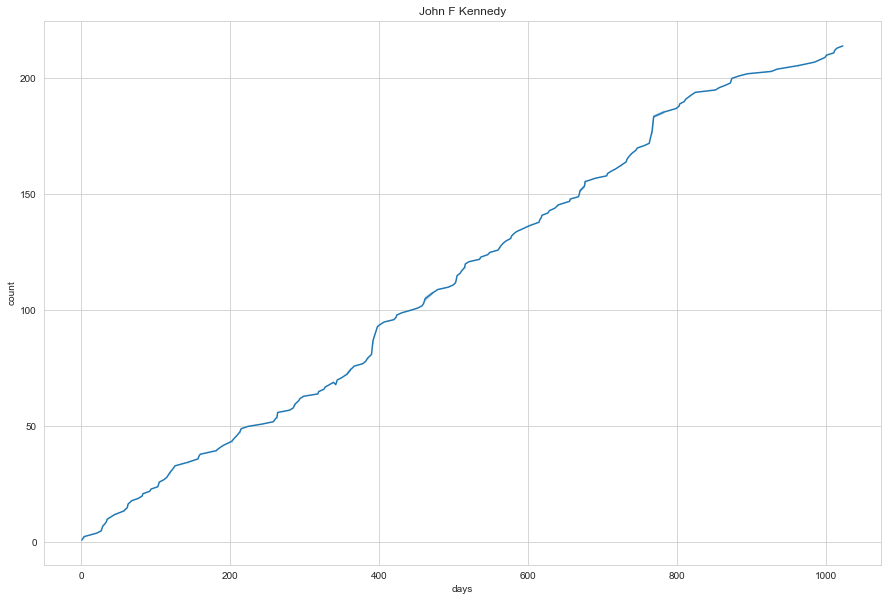

In [43]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x='days', y='count', data=df[df['president']==preses[3]])
plt.title(preses[3])
plt.show()

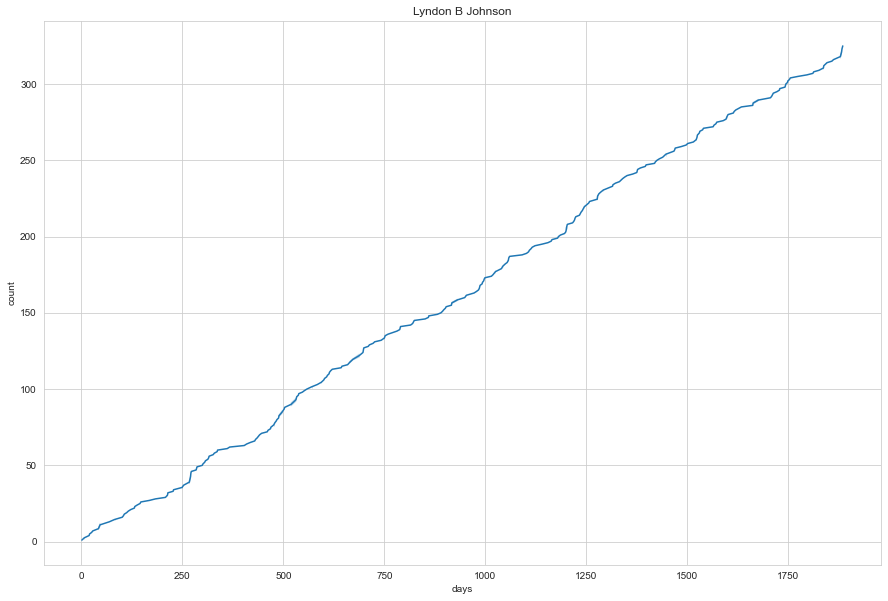

In [44]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x='days', y='count', data=df[df['president']==preses[4]])
plt.title(preses[4])
plt.show()

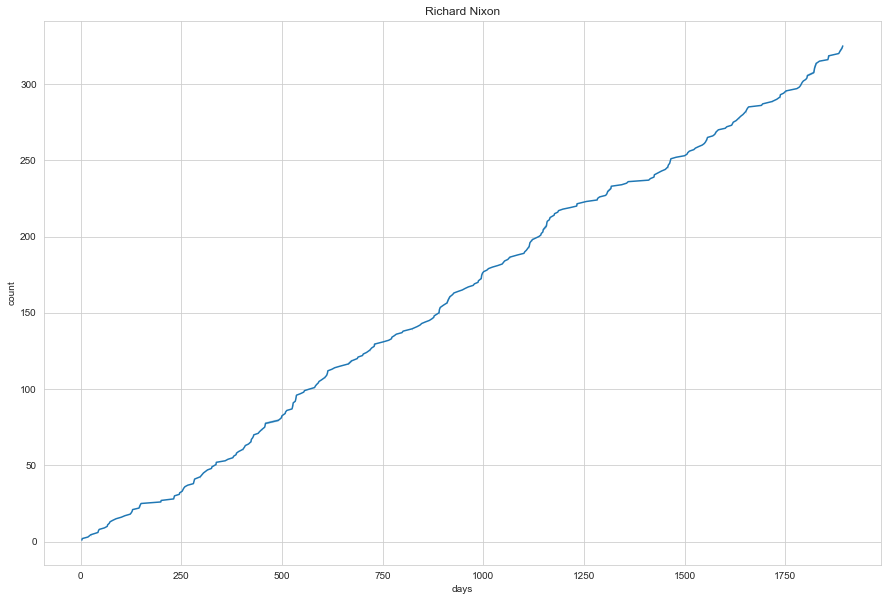

In [45]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x='days', y='count', data=df[df['president']==preses[5]])
plt.title(preses[5])
plt.show()

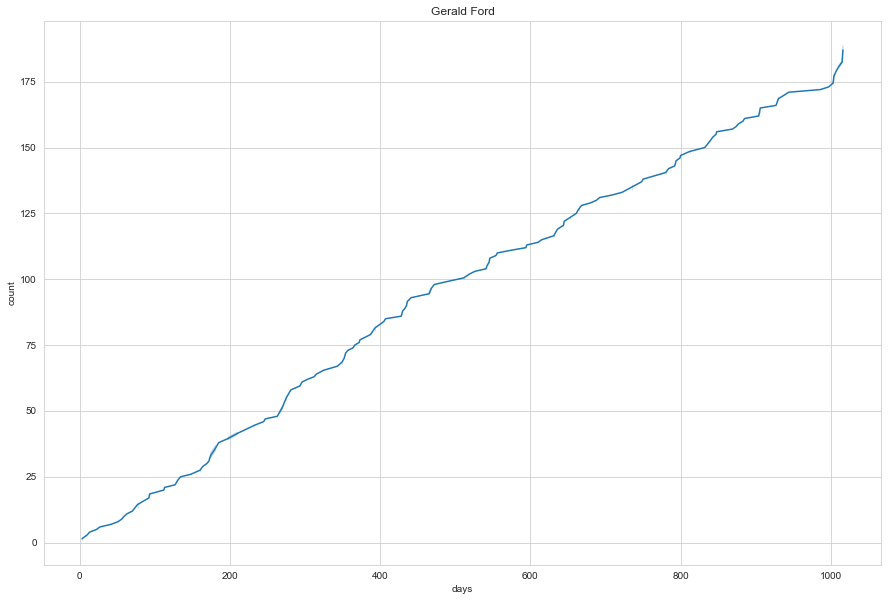

In [46]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x='days', y='count', data=df[df['president']==preses[6]])
plt.title(preses[6])
plt.show()

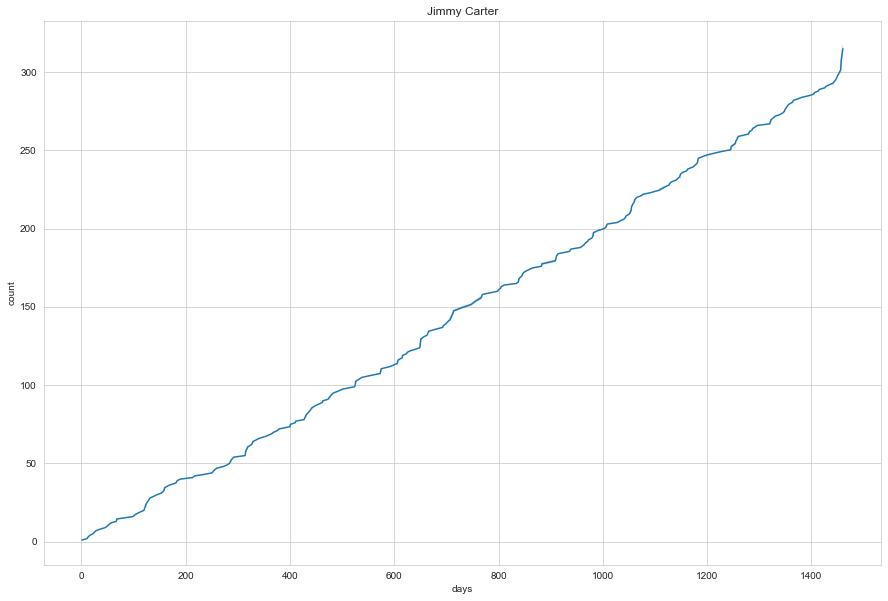

In [47]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x='days', y='count', data=df[df['president']==preses[7]])
plt.title(preses[7])
plt.show()

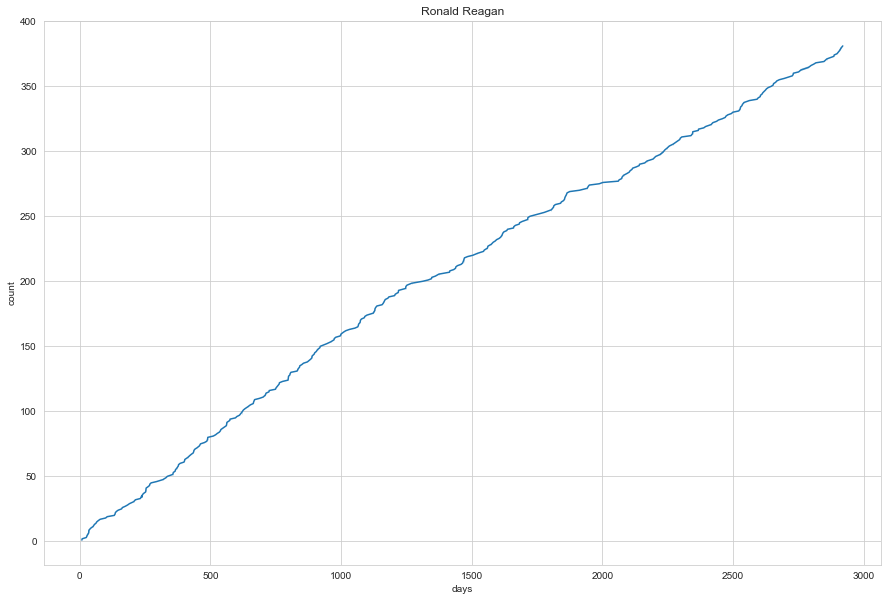

In [48]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x='days', y='count', data=df[df['president']==preses[8]])
plt.title(preses[8])
plt.show()

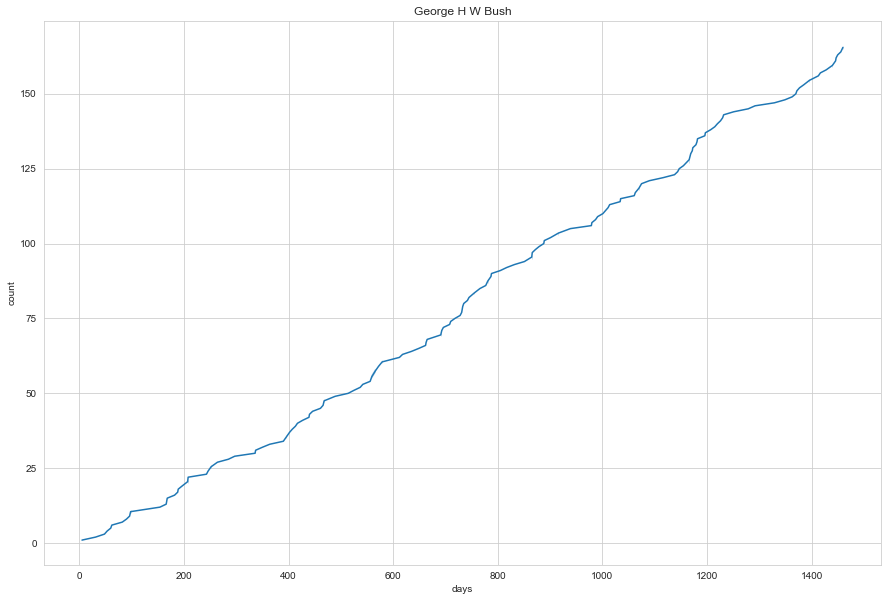

In [49]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x='days', y='count', data=df[df['president']==preses[9]])
plt.title(preses[9])
plt.show()

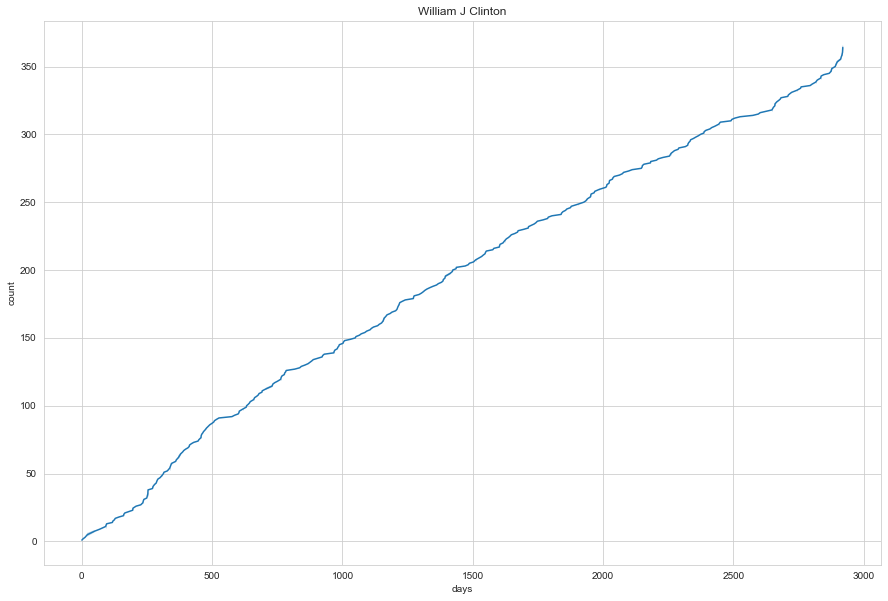

In [50]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x='days', y='count', data=df[df['president']==preses[10]])
plt.title(preses[10])
plt.show()

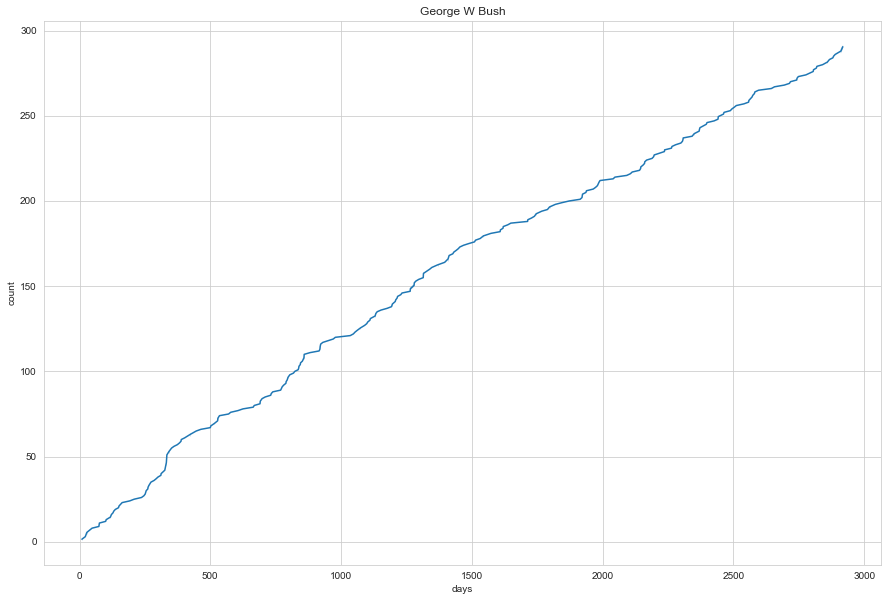

In [51]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x='days', y='count', data=df[df['president']==preses[11]])
plt.title(preses[11])
plt.show()

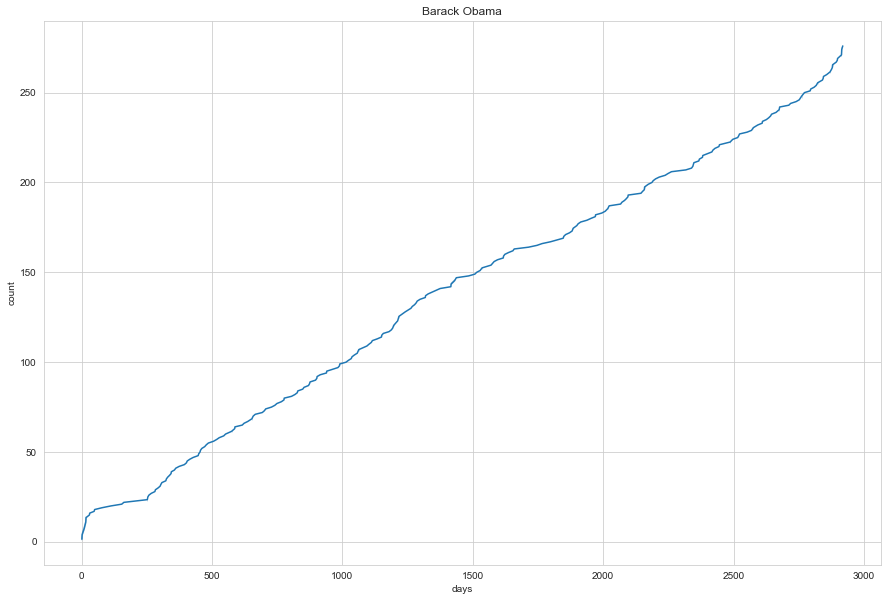

In [52]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x='days', y='count', data=df[df['president']==preses[12]])
plt.title(preses[12])
plt.show()

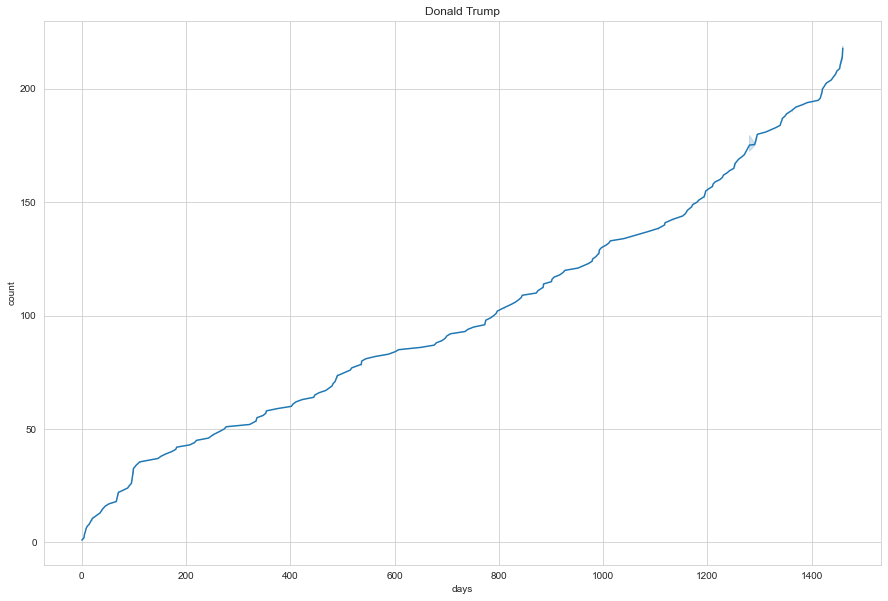

In [53]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x='days', y='count', data=df[df['president']==preses[13]])
plt.title(preses[13])
plt.show()

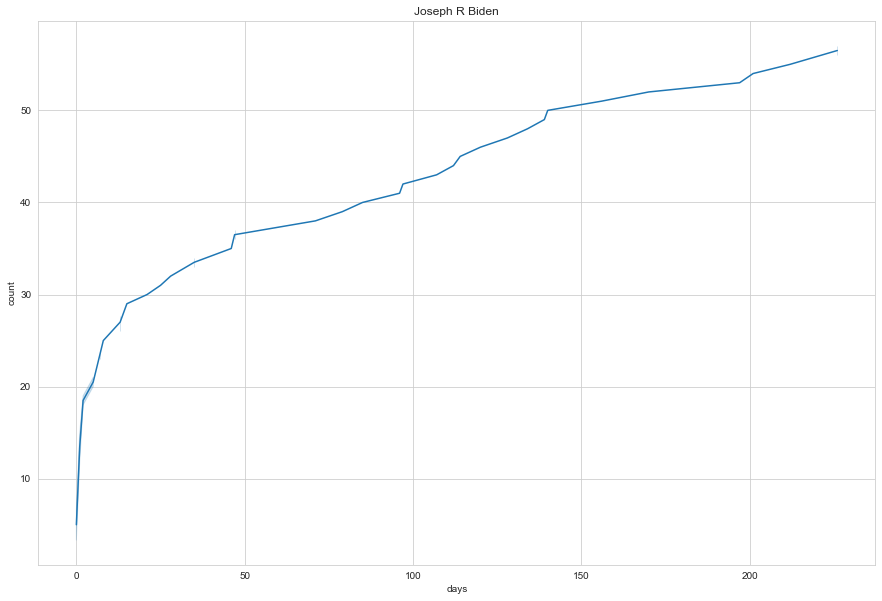

In [54]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x='days', y='count', data=df[df['president']==preses[14]])
plt.title(preses[14])
plt.show()